In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pymongo
import pandas as pd
import time

<IPython.core.display.Javascript object>


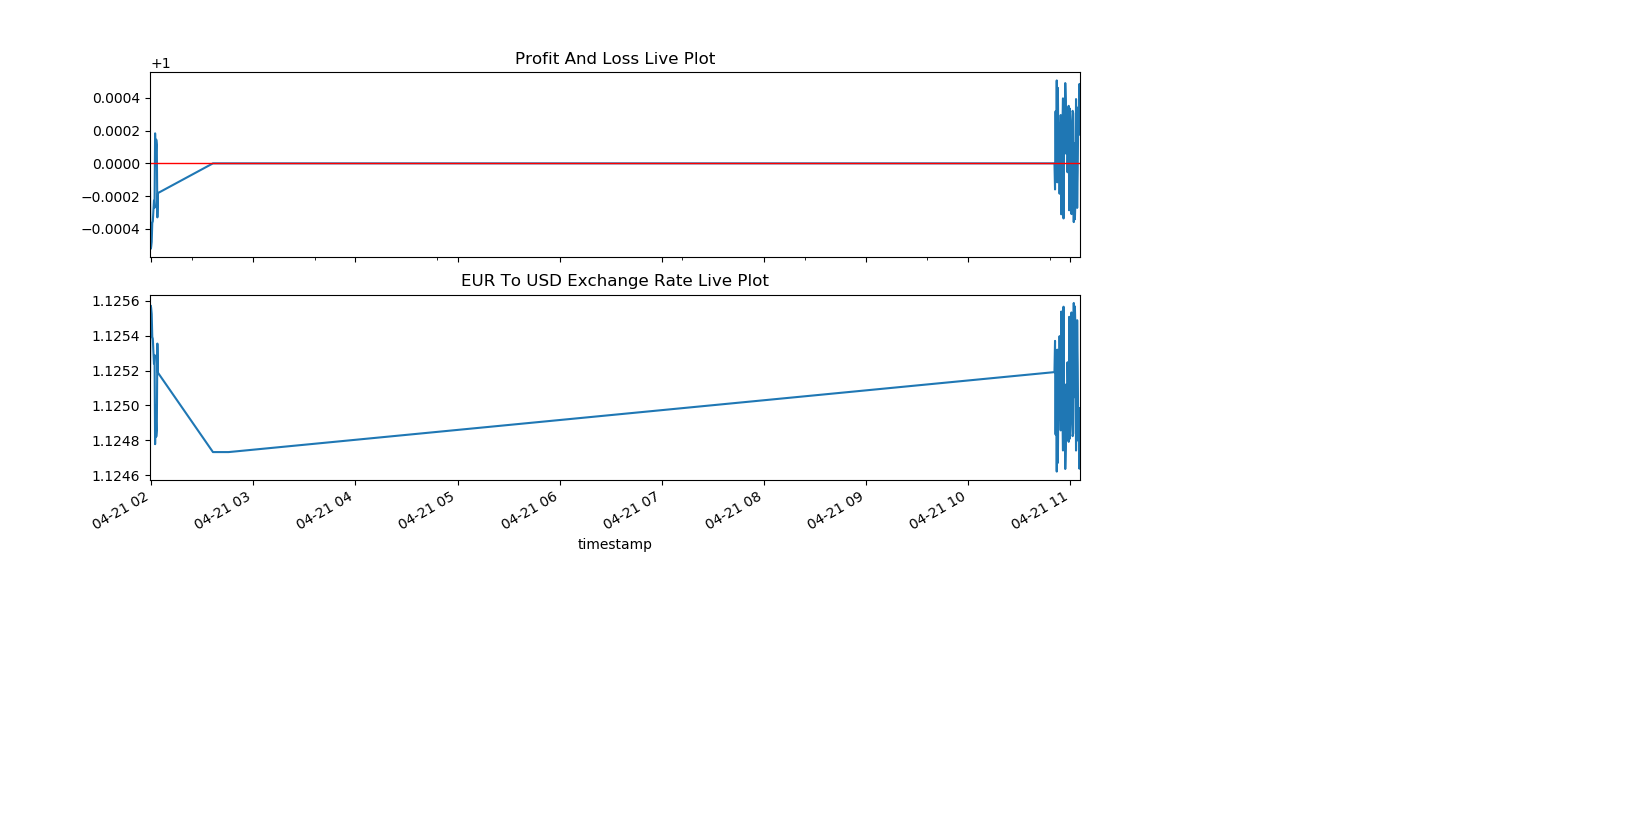

KeyboardInterrupt: 

In [2]:
# m = 100
# n = 100
# matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure(figsize =(12,6))
gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
# ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(211)
plt.ion()

fig.show()
fig.canvas.draw()
# plt.tight_layout()

for i in range(0,50000):
    ax1.clear()
    ax2.clear()
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mycol = myclient["Prediction"]["prediction"].find()
    mydf = pd.DataFrame(list(mycol))
    mydf["timestamp"] = pd.to_datetime(mydf["datetime"])
    mydf.index = mydf["timestamp"]
    mydf["cumulativeReturns"].plot(ax =ax1, sharex= True, title = "Profit And Loss Live Plot")
    ax1.axhline(y=1, linewidth=1, color='r')
#     ax1.grid(linestyle='-', linewidth='0.1', color='black')
    mydf["xrate"].plot(ax =ax2, sharex=True, title = "EUR To USD Exchange Rate Live Plot")
#     ax2.grid(linestyle='-', linewidth='0.1', color='black')
#     ax.plot(matrix[i,:])
    fig.canvas.draw()
    time.sleep(20)